Recommender/recommendation system is a subclass of information filtering system that seeks to predict the rating/ preference a user would give to an item.

They are primarily used in applications where a person/ entity is involved with a product/ service. To further improve their experience with this product, we try to personalize it to their needs. For this we have to look up at their past interactions with this product.

In one line -> **Specialized content for everyone.**

For further info, [Wiki](https://en.wikipedia.org/wiki/Recommender_system)

**Types of Recommender System**

* 1). [Popularity Based](https://www.kaggle.com/sasha18/popularity-based-movie-recommendation)
* 2). Classification Based
* 3). [Content Based](https://www.kaggle.com/sasha18/recommend-books-using-count-tfidf-on-titles)
* 4). [Collaborative Based](https://www.kaggle.com/sasha18/recommend-top-restaurants-based-on-preference)
* 5). [Hybrid Based (Content + Collaborative)](https://www.kaggle.com/sasha18/recommend-top-restaurants-based-on-preference)
* 6). [Association Based Rule Mining](https://www.kaggle.com/sasha18/perform-market-basket-analysis-with-e-comm-data)

# Market basket analysis using Apriori algorithm

Here we attempt to group common patterns of items together using Association rules using Apriori algorithm.

Association rules do not extract an individual's preference, rather find relationships between sets of elements of every distinct transaction.

Metrics useful for MBA:

* A).Support: % of times when Milk & Butter were purchased. 
    * (No.of transactions having Milk & Butter / Total No. of transactions) in %

* B).Confidence: Whats the probability % of Butter in basket provided Milk in basket ?
    * Confidence(Butter -> Milk) = (support(Milk U Butter)/ support(Butter) remember this is not equal to Confidence(Milk, Butter) Ranges from 0 (No relation) to 1 (High relation) in %

* C).Lift: How much will sale of Butter increase when you sell Milk or vice versa ?
    * Lift{Milk, Butter} = Lift{Butter,Milk} = support(Milk U Butter)/ support(Milk) * support(Butter) Ranges from 1 (No relationship) to 1> Negative relationship, 1< Positive relationship

* D).Conviction: What is your conviction to purchase product 2 provided you have purchased product 1?
    * High value, higher chances of purchasing product 2
    * Conviction{Trousers -> Belt} = 2.614
    * Conviction{Shirts -> Belt} = 0.86
    
# Import packages and dataset

In [ ]:
!pip install pandas ml_extend

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
data = data.head(30000) #using only half data due to memory issues
data.head()

Order_item_id column is the counter that would count no. of items in an order. For Apriori we need Quantity column,that will calculate the quantity of a product purchased in a given order. We shall append this column towards the end.

In [ ]:
data.shape

In [ ]:
#Append Quantity column. Since, there's 1 product on every row we can easily use Quantity as 1 which will be added subsequently.
data.insert(7, 'quantity',1)
data.shape

In [ ]:
data.head()

In real world scenarios, you will receive data in this format with every product within an order given in separate rows. We have to find the relation between 2 or more products frequently appearing together. We can't use this data the way it is, we got to further convert this into a format that is accepted by Apriori algorithm.

# Data Preprocessing

**Things to do:**
* Total no. of unique orders and products
* Whether to drop products that are purchased within a given threshold
* Average no. of products purchased in a given order

In [ ]:
#Total no. of unique orders and products
data.describe(include = 'all')

If your dataset has a count of order numbers as huge as 1 million, then you can choose to drop some products that were purchased just once or below some threshold. Here I would take a threshold of 10. This would ensure not to overburden the system while giving you the best results. 

*No point in deriving relations out of products that were rarely purchased, right.*

In [ ]:
data['product_id'].value_counts()

In [ ]:
#If you want to cross check the data you can replace 10 with 80.
item_freq = data['product_id'].value_counts()
data = data[data.isin(item_freq.index[item_freq >= 10]).values]
data['product_id'].value_counts()

With this we consider only the products that were purchased for a min. of 10 times.

In [ ]:
#Average products purchased per transaction
data['order_id'].value_counts().mean()

# Recommend similar products using Apriori

For a detailed explanation, please refer [KDnuggets](https://www.kdnuggets.com/2019/12/market-basket-analysis.html)

**Things to do:**
* Create a basket of all products, orders and quantity
* Perform One hot encoding so as to convert all quantities into format suitable for apriori algorithm
* Build list of frequent itemsets
* Generate rules based on your requirements

In [ ]:
#Create a basket of all products, orders and quantity
basket = (data.groupby(['order_id','product_id'])['quantity']).sum().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

In [ ]:
#Convert 0.0 to 0, convert the units to One hot encoded values
def encode_units(x):
    if x<= 0:
        return 0
    if x>=1:
        return 1
    
basket_sets = basket.applymap(encode_units)
basket_sets.head()

## Frequent Itemsets

In [ ]:
#Build frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support = 0.0001, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
#Create Rules
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)
rules

In [ ]:
#Products having 50% confidence likely to be purchased together
rules[rules['confidence'] >= 0.50]

# Summary & Model deployment

While performing MBA on huge datasets you have to answer some questions,
* What location is this data representative of
* With E-commerce data it highly depends on the demography of the region as it directly relates to products sold
* Different types of customers, i.e end user or retailer
* It is not a one solution fits all so ensure the distribution of data is balanced

You may also face memory issues, such cases you can tweak product threshold values and support values based on domain knowledge in a way, such that important info isn't lost. Stakeholders would mostly be interested in Support, Confidence, sometimes Lift too. Suggest you to acquaint yourselves with leverage and conviction, they are the same info presented in a different perspective. 

For me, presenting this report to stakeholders becomes a challenge, I googled a lot but couldn't  find a solution. I usually follow the below format to explain this report. I'll change this when I have a better one.

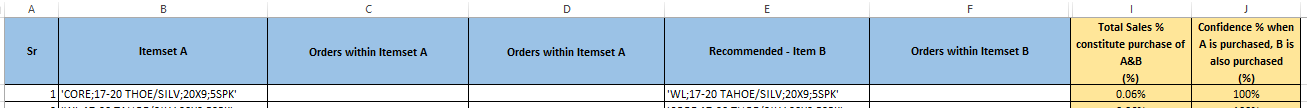

If you want to find a better algorithm than Apriori then you should try this one and let us know. -> [SPMF](http://www.philippe-fournier-viger.com/spmf/)

***Happy recommending !! :)***